# Assignement 2
## Due May 3st

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

# Exercise 1

Here we define the function that will generate our data

In [2]:
def get_gaussian2d_data_with_labels(n1, n2):
    
    # This is to garantee that we all have the same data points
    np.random.seed(n1+n2)
    
    mu1 = [1, 1]
    var1 = [[0.2, 0],
            [0, 0.2]]
    
    mu2 = [3, 1]
    var2 = [[2, 0],
            [0, 2]]
    
    data = np.concatenate([np.random.multivariate_normal(mu1, var1, n1),
                           np.random.multivariate_normal(mu2, var2, n2)])
    
    labels = np.concatenate([np.repeat(1, n1),
                             np.repeat(2, n2)])
                           
    return data, labels  

## a)

Create train dataset and plot it

In [3]:
train_n1, train_n2 = 25, 25
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

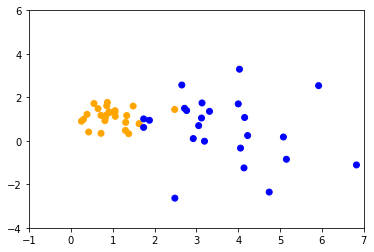

In [4]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Create test dataset and plot it

In [5]:
test_n1, test_n2 = 100, 100
test_data, test_labels = get_gaussian2d_data_with_labels(test_n1, test_n2)

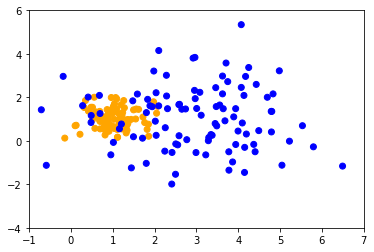

In [6]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in test_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## b)

Define knn and predict with $k = 3$ and plot the result

In [31]:
def knnClassify(train_data, train_labels, test_data, k=1):
    pred_labels = []
    
    # Compute distances
    for test_point in test_data:
        distances = []
        for train_point in train_data:
            distances.append(np.linalg.norm(test_point-train_point))
        # Sort distances in ascending order and choose k nearest neighbours
        indices_nearest_neighbours = np.argsort(distances)[0:k]
        labels_nearest_neighbours = list(train_labels[indices_nearest_neighbours])
        
        if labels_nearest_neighbours.count(1) > labels_nearest_neighbours.count(2):
            pred_labels.append(1)
        else:
            pred_labels.append(2)
        
    return pred_labels

In [8]:
pred_labels = knnClassify(train_data, train_labels, test_data, k=3)
print(pred_labels)

[1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2]


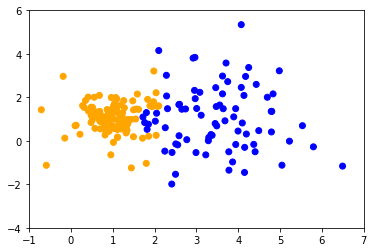

In [9]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in pred_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

#### Expectations:
In the area without overlaps in the training data the prediction of the knn should be pretty good. However, in the region of overlap, some wrong predictions should occur

## c)

Plot the correct predictions in black and the wrong one in red

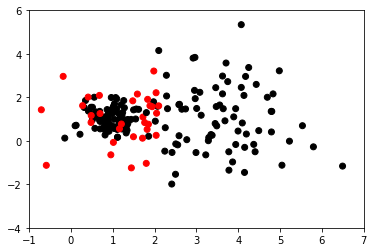

In [10]:
correct_preds = []
for i in range(0,len(test_labels)):
    if (test_labels[i] == pred_labels[i]):
        correct_preds.append(1)
    else:
        correct_preds.append(0)
        
fig = plt.figure()
color = ['black' if c == 1 else 'red' for c in correct_preds]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## d)

define the empirical risk with 0-1-loss and compute the 0-1 loss for the labels predicted above

In [11]:
def empRiskWith01loss(test_labels, pred_labels):
    emp_risk = 0
    for i in range(0, len(test_labels)):
        if test_labels[i] == pred_labels[i]:
           pass
        else:
            emp_risk = emp_risk + 1
            
    emp_risk = emp_risk/len(test_labels)
    return emp_risk

In [12]:
empRiskWith01loss(test_labels, pred_labels)

0.155

Compute the risk for various k and plot it

Computing knn for k= 1 ...
Computing knn for k= 3 ...
Computing knn for k= 5 ...
Computing knn for k= 7 ...
Computing knn for k= 10 ...
Computing knn for k= 15 ...
Computing knn for k= 20 ...
Finished!


Text(0,0.5,'Empirical Risk with 0-1 loss')

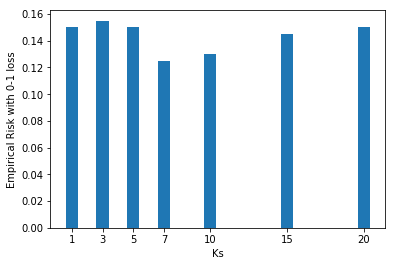

In [15]:
ks = [1, 3, 5, 7, 10, 15, 20]

risks = []
for k in ks:
    print("Computing knn for k=",k,"...")
    risks.append(empRiskWith01loss(test_labels, knnClassify(train_data, train_labels, test_data, k)))

print("Finished!")
fig = plt.figure()
plt.bar(ks, risks)
plt.xlabel("Ks")
plt.xticks(ks)
plt.ylabel("Empirical Risk with 0-1 loss")
    

I would choose k=7, because it hast the minimal empirical risk

### e)

Create train dataset with n1 = n2 = 500, plot it and repeat the same analysis as in d)

In [16]:
train_n1, train_n2 = 500, 500
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

Computing knn for k= 1 ...
Computing knn for k= 3 ...
Computing knn for k= 5 ...
Computing knn for k= 7 ...
Computing knn for k= 10 ...
Computing knn for k= 15 ...
Computing knn for k= 20 ...
Finished!


Text(0,0.5,'Empirical Risk with 0-1 loss')

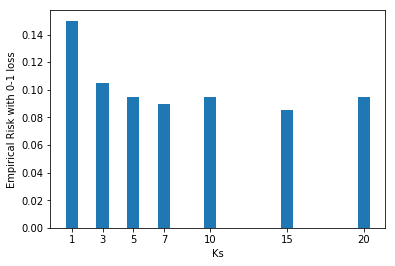

In [17]:
risks = []
for k in ks:
    print("Computing knn for k=",k,"...")
    risks.append(empRiskWith01loss(test_labels, knnClassify(train_data, train_labels, test_data, k)))

print("Finished!")
fig = plt.figure()
plt.bar(ks, risks)
plt.xlabel("Ks")
plt.xticks(ks)
plt.ylabel("Empirical Risk with 0-1 loss")

In this case k=15 performed the best. For a higher number of training data a higher k should be chosen. Otherwise we can often loose ourself in a local optimum.

### f)

Create train dataset with n1 = n2 = 1000, plot it and repeat the same analysis as in d)

In [18]:
train_n1, train_n2 = 1000, 1000
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

Computing knn for k= 1 ...
Computing knn for k= 3 ...
Computing knn for k= 5 ...
Computing knn for k= 7 ...
Computing knn for k= 10 ...
Computing knn for k= 15 ...
Computing knn for k= 20 ...
Finished!


Text(0,0.5,'Empirical Risk with 0-1 loss')

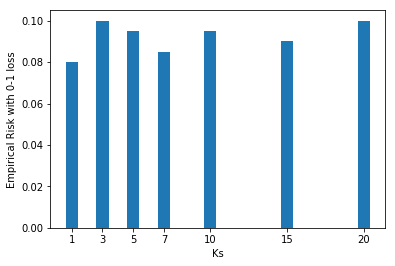

In [19]:
risks = []
for k in ks:
    print("Computing knn for k=",k,"...")
    risks.append(empRiskWith01loss(test_labels, knnClassify(train_data, train_labels, test_data, k)))

print("Finished!")
fig = plt.figure()
plt.bar(ks, risks)
plt.xlabel("Ks")
plt.xticks(ks)
plt.ylabel("Empirical Risk with 0-1 loss")

For even more training samples in this case k=1 is the best choice.

# Exercise 2
Load data and show one class

In [20]:
train_df = pd.read_csv('train.csv', sep='\t',)
train_data = train_df.drop(['Label'], axis=1).as_matrix()
train_labels = train_df['Label'].as_matrix()
test_df = pd.read_csv('test.csv', sep='\t')
test_data = test_df.drop(['Label'], axis=1).as_matrix()
test_labels = test_df['Label'].as_matrix()

## a)

Find out if the dataset is balanced

In [21]:
def is_balanced(test_labels):
    unique, counts = np.unique(test_labels, return_counts=True)
    if len(np.unique(counts)) == 1:
        return True
    else:
        return False

In [22]:
print(is_balanced(test_labels))

True


## b)

Compute knn for the USPS dataset

In [36]:
def knnClassify(train_data, train_labels, test_data, k=1):
    pred_labels = []
    distances = euclidean_distances(test_data, train_data)
    
    for i in range(len(test_data)):
        indices_nearest_neighbours = np.argsort(distances[i])[0:k]
        labels_nearest_neighbours = list(train_labels[indices_nearest_neighbours])
        unique, count = np.unique(labels_nearest_neighbours, return_counts = True)
        dict_labels = dict(zip(unique, count))
        pred_label = max(dict_labels, key=dict_labels.get)
        pred_labels.append(pred_label)
    
    return pred_labels

In [37]:
ks = range(1,20)

In [38]:
risks = []
for k in ks:
    print("Computing knn for k=",k,"...")
    risks.append(empRiskWith01loss(test_labels, knnClassify(train_data, train_labels, test_data, k)))
print("Finished!")

Computing knn for k= 1 ...
Computing knn for k= 2 ...
Computing knn for k= 3 ...
Computing knn for k= 4 ...
Computing knn for k= 5 ...
Computing knn for k= 6 ...
Computing knn for k= 7 ...
Computing knn for k= 8 ...
Computing knn for k= 9 ...
Computing knn for k= 10 ...
Computing knn for k= 11 ...
Computing knn for k= 12 ...
Computing knn for k= 13 ...
Computing knn for k= 14 ...
Computing knn for k= 15 ...
Computing knn for k= 16 ...
Computing knn for k= 17 ...
Computing knn for k= 18 ...
Computing knn for k= 19 ...
Finished!


Text(0,0.5,'Empirical Risk with 0-1 loss')

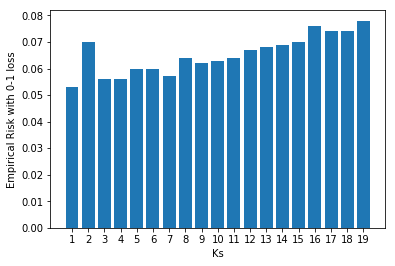

In [39]:
fig = plt.figure()
plt.bar(ks, risks)
plt.xlabel("Ks")
plt.xticks(ks)
plt.ylabel("Empirical Risk with 0-1 loss")